In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random


In [2]:
df = pd.read_csv("https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Breast%20Cancer%20Wisconsin/breast-cancer-wisconsin.csv",header = None  )

In [3]:
columns = ['Id number' , 'Clump Thickness' , 'Uniformity of Cell Size' , 'Uniformity of Cell Shape' , 'Marginal Adhesion',
           'Single Epithelial Cell Size' , 'Bare Nuclei' , 'Bland Chromatin' , 'Normal Nucleoli' , 'Mitoses' , 'Class']
df.columns = columns

In [4]:
df.columns

Index(['Id number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df = df.drop('Id number' , axis = 1)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Class']=encoder.fit_transform(df['Class'])

In [8]:
df.isnull().sum()


Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

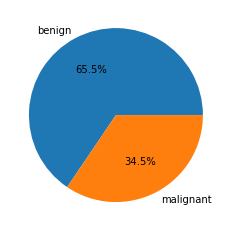

In [9]:
plt.pie(df["Class"].value_counts(),labels=['benign' , 'malignant'],autopct='%1.1f%%')
plt.show()


In [10]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [11]:
df_x = df.iloc[:,:-1]
df_x = df_x.replace('?', 0)

In [12]:
df_y = df.iloc[:,-1]

In [13]:
x = np.array(df_x)
y = np.array(df_y)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=1)

In [15]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_test_pred = classifier.predict(x_test)
print(y_test_pred.shape)
print(y_test_pred)

(175,)
[0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0]


In [18]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(y_test, y_test_pred))

Accuracy :  0.9771428571428571


In [19]:
acuurate = np.mean(y_test == y_test_pred)
acuurate

0.9771428571428571

In [20]:
df_y_test_pred = pd.DataFrame(y_test_pred)
print("0 = Benign , 1 = Melignant \n \n",
      df_y_test_pred.value_counts())

0 = Benign , 1 = Melignant 
 
 0    120
1     55
dtype: int64


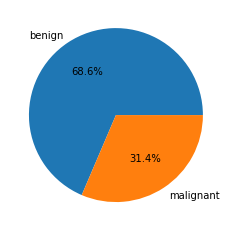

In [21]:
# Testing data predictions Visualization 

plt.pie(df_y_test_pred.value_counts(),labels=['benign' , 'malignant'],autopct='%1.1f%%')
plt.show()


In [22]:
from sklearn.metrics import classification_report as cr
print(cr(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       118
           1       0.98      0.95      0.96        57

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175



In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[117   1]
 [  3  54]]


In [1]:
x_train.shape

NameError: name 'x_train' is not defined

# Own Algorithm

In [39]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(x, y, theta):
    m = len(y)
    h = sigmoid(x.dot(theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(x, y, alpha, iterations):
    m, n = x.shape
    theta = np.zeros(n)
    costs = []

    for _ in range(iterations):
        h = sigmoid(x.dot(theta))
        error = h - y
        gradient = (1 / m) * x.T.dot(error)
        theta -= alpha * gradient
        cost = cost_function(x, y, theta)
        costs.append(cost)

    return theta, costs

# Add bias term to training and testing data
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

# Set hyperparameters
alpha = 0.1
iterations = 1000

# Perform gradient descent on training data
theta, costs = gradient_descent(x_train, y_train, alpha, iterations)

# Predict on testing data
y_pred = np.round(sigmoid(x_test.dot(theta)))

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)

print("Accuracy:", accuracy)
print(theta)

Accuracy: 0.9771428571428571


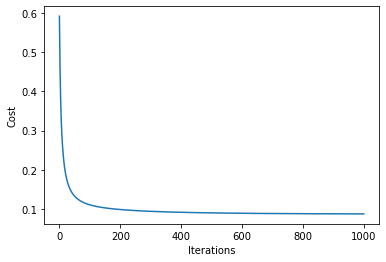

In [45]:
# CURVE to show that after enough iteration for a good learning rate , the cost function will become same(it won't change)

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [42]:
print(cr(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       118
           1       0.98      0.95      0.96        57

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175



In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[117   1]
 [  3  54]]
